### 无监督学习与聚类算法
- 概述
    - 在此之前我们所学习到的算法模型都是属于有监督学习的模型算法，即模型需要的样本数据既需要有特征矩阵X，也需要有真实的标签y。那么在机器学习中也有一部分的算法模型是属于无监督学习分类的，所谓的无监督学习是指模型只需要使用特征矩阵X即可，不需要真实的标签y。那么聚类算法就是无监督学习中的代表之一。
- 聚类算法
    - 聚类算法其目的是将数据划分成有意义或有用的组(或簇)。这种划分可以基于我们的业务 需求或建模需求来完成，也可以单纯地帮助我们探索数据的自然结构和分布。比如在商业中，如果我们手头有大量 的当前和潜在客户的信息，我们可以使用聚类将客户划分为若干组，以便进一步分析和开展营销活动。
- 聚类和分类区别
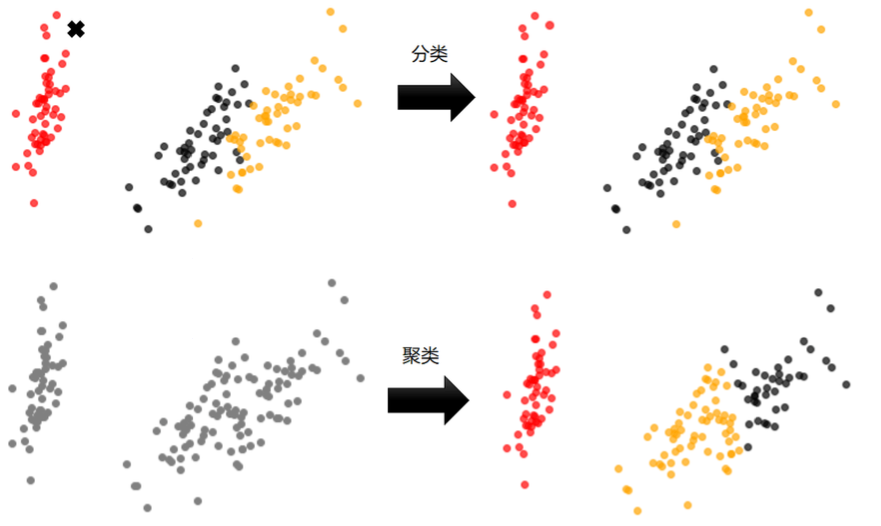

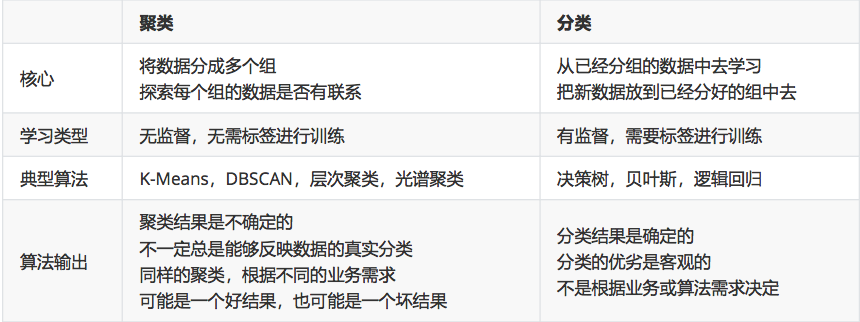

### KMeans算法原理阐述
- 簇与质心
    - 簇：KMeans算法将一组N个样本的特征矩阵X划分为K个无交集的簇，直观上来看是簇是一个又一个聚集在一起的数 据，在一个簇中的数据就认为是同一类。簇就是聚类的结果表现。
    - 质心：簇中所有数据的均值u通常被称为这个簇的“质心”(centroids)。
        - 在一个二维平面中，一簇数据点的质心的横坐标就是这一簇数据点的横坐标的均值，质心的纵坐标就是这一簇数据点的纵坐标的均值。同理可推广至高维空间。
        - 质心的个数也聚类后的类别数是一致的
- 在KMeans算法中，簇的个数K是一个超参数，需要我们人为输入来确定。KMeans的核心任务就是根据我们设定好的K，找出K个最优的质心，并将离这些质心最近的数据分别分配到这些质心代表的簇中去。具体过程可以总结如下:
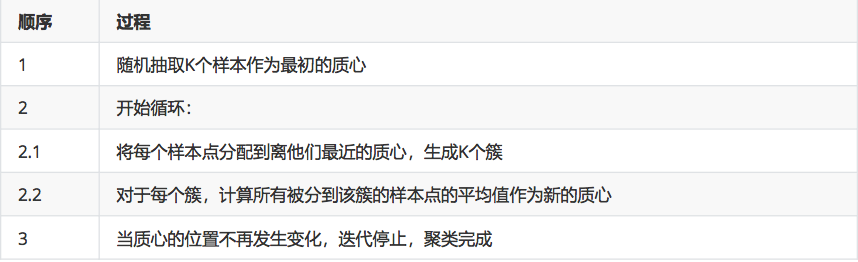
    - 那什么情况下，质心的位置会不再变化呢?当我们找到一个质心，在每次迭代中被分配到这个质心上的样本都是一致的，即每次新生成的簇都是一致的，所有的样本点都不会再从一个簇转移到另一个簇，质心就不会变化了。

- 这个过程在可以由下图来显示，我们规定，将数据分为4簇(K=4)，其中白色X代表质心的位置:
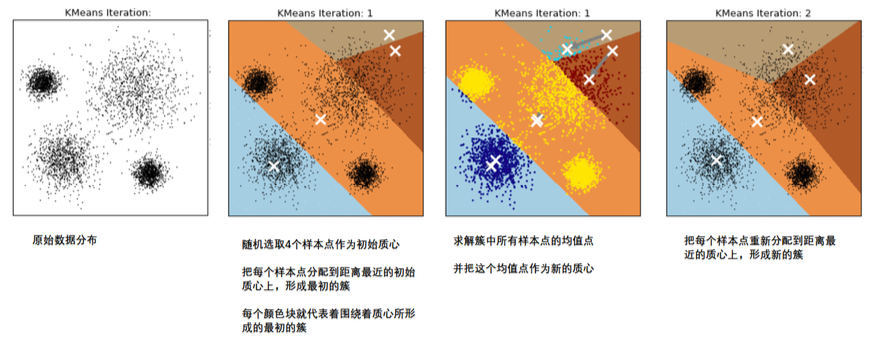

- 聚类算法聚出的类有什么含义呢?这些类有什么样的性质?
    - 我们认为，被分在同一个簇中的数据是有相似性的，而不同簇中的数据是不同的，当聚类完毕之后，我们就要分别去研究每个簇中的样本都有什么样的性质，从而根据业务需求制定不同的商业或者科技策略。
    - 聚类算法追求“簇内差异小，簇外差异 大”：
        - 而这个“差异“，由样本点到其所在簇的质心的距离来衡量。
- 对于一个簇来说，所有样本点到质心的距离之和越小，我们就认为这个簇中的样本越相似，簇内差异就越小。而距离的衡量方法有多种，令x表示簇中的一个样本点，u表示该簇中的质心，n表示每个样本点中的特征数目，i表示组成点的每个特征，则该样本点到质心的距离可以由以下距离来度量:
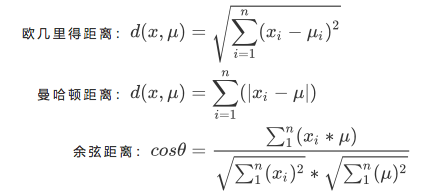


### KMeans有损失函数吗？


#### 簇内平方和
- 如我们采用欧几里得距离，则一个簇中所有样本点到质心的距离的平方和为簇内平方和。使用簇内平方和就可以表示簇内差异的大小


#### 整体平方和
- 将一个数据集中的所有簇的簇内平方和相加，就得到了整体平方和(Total Cluster Sum of Square)，又叫做total inertia。Total Inertia越小，代表着每个簇内样本越相似，聚类的效果就越好。


- KMeans追求的是，求解能够让簇内平方和最小化的质心。实际上，在质心不断变化不断迭代的过程中，整体平方和是越来越小的。我们可以使用数学来证明，当整体平方和最小的时候，质心就不再发生变化了。如此，K-Means的求解过程，就变成了一个最优化问题。因此我们认为：
    - 在KMeans中，我们在一个固定的簇数K下，最小化整体平方和来求解最佳质心，并基于质心的存在去进行聚类。并且，整体距离平方和的最小值其实可以使用梯度下降来求解。因此，有许多博客和教材都这样写道:簇内平方和/整体平方和是KMeans的损失函数。
- 但是也有人认为：
    - 损失函数本质是用来衡量模型的拟合效果的（损失越小，模型的拟合效果越好），只有有着求解参数需求的算法，才会有损失函数。Kmeans不求解什么参数，它的模型本质也没有在拟合数据，而是在对数据进行一种探索。所以如果你去问大多数数据挖掘工程师，甚至是算法工程师，他们可能会告诉你说，K-Means不存在 什么损失函数，整体平方和更像是Kmeans的模型评估指标，而非损失函数。


### API：sklearn.cluster.KMeans
- class sklearn.cluster.KMeans (n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)

In [2]:
from sklearn.cluster import KMeans

- 重要参数：
    - n_clusters
        - n_clusters是KMeans中的k，表示着我们告诉模型我们要分几类。这是KMeans当中唯一一个必填的参数，默认为8 类，但通常我们的聚类结果会是一个小于8的结果。通常，在开始聚类之前，我们并不知道n_clusters究竟是多少， 因此我们要对它进行探索。
    - random_state
        - 用于初始化质心的生成器。

- KMeans的首次探索
    - 当我们拿到一个数据集，如果可能的话，我们希望能够通过绘图先观察一下这个数据集的数据分布，以此来为我们聚类时输入的n_clusters做一个参考。 首先，我们来自己创建一个数据集使用make_blobs。这样的数据集是我们自己创建，所以是有标签的。

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=10)

/Users/bobo/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


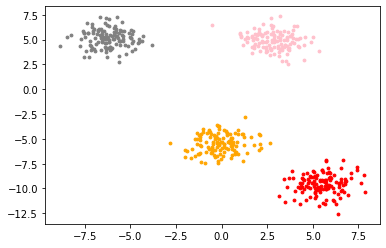

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
#将原始已经有类别的样本数据绘制在散点图中，每一个类别使用不同颜色来表示
color = ['red','pink','orange','gray']
fig,ax1 = plt.subplots(1)
for i in range(4):
    ax1.scatter(X[y==i,0],X[y==i,1],c=color[i],s=8)
plt.show()

In [10]:
#使用聚类算法进行聚类操作
k = KMeans(n_clusters=4)
k.fit(X)

KMeans(n_clusters=4)

- 基于这个分布，我们来使用Kmeans进行聚类。首先，我们要假设一下，这个数据中有几簇?
    - labels_:返回每一个样本的分组结果
    - cluster_centers_：返回质心的坐标
    - inertia_：整体平方和

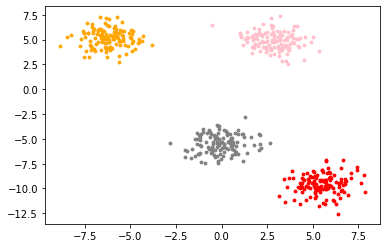

In [17]:
color = ['red','pink','orange','gray']
fig,ax1 = plt.subplots(1)
y = k.labels_ #聚类的结果
for i in range(4):
    ax1.scatter(X[y==i,0],X[y==i,1],c=color[i],s=8)
plt.show()

- Kmeans对结果的预测：
    - KMeans算法通常情况是不需要预测结果的，因为该算法本质上是在对未知分类数据的探索。但是在某些情况下我们也可以使用predict进行预测操作。
    - 我们什么时候需要predict呢？
        - 当数据量太大的时候！
            - 其实我们不必使用所有的数据来寻找质心，少量的数据就可以帮助我们确定质心了。
            - 当我们数据量非常大的时候，我们可以使用部分数据来帮助我们确认质心
            - 剩下的数据的聚类结果，使用predict来调用

- 总结：数据量非常大的时候，效果会好。但从运行得出这样的结果，肯定与直接fit全部数据会不一致。有时候，当我们不要求那么精确，或者我们的数据量实在太大，那我们可以使用这种方法，使用接口predict。如果数据量还行，不是特别大，直接使用fit之后调用属性.labels_提出来聚类的结果。

- 逐步增加质心的数量，查看不同的Inertia

### 面试高危问题:如何衡量聚类算法的效果?
- 聚类模型的结果不是某种标签输出，并且聚类的结果是不确定的，其优劣由业务需求或者算法需求来决定，并且没有永远的正确答案。
    - 那我们如何衡量聚类的效果呢?

### 聚类算法的模型评估指标
- 记得我们说过，KMeans的目标是确保“簇内差异小，簇外差异大”，我们就可以通过衡量簇内差异来衡量聚类的效果。我们刚才说过，簇内平方和是用距离来衡量簇内差异的指标，因此，我们是否可以使用簇内平方和来作为聚类的衡量指标呢?簇内平方和越小模型越好嘛？
- 可以，但是这个指标的缺点和极限太大。

#### 簇内平方和Inertia的缺点：
- 1.首先，它不是有界的。我们只知道，Inertia是越小越好，是0最好，但我们不知道，一个较小的Inertia究竟有没有 达到模型的极限，能否继续提高。
- 2.它的计算太容易受到特征数目的影响，数据维度很大的时候，Inertia的计算量会爆炸，不适合用来一次次评估模型。
- 3.它会受到超参数K的影响，在我们之前的常识中其实我们已经发现，随着K越大，Inertia注定会越来越小，但 这并不代表模型的效果越来越好了
- 4.使用Inertia作为评估指标，会让聚类算法在一些细长簇，环形簇，或者不规则形状的 流形时表现不佳：
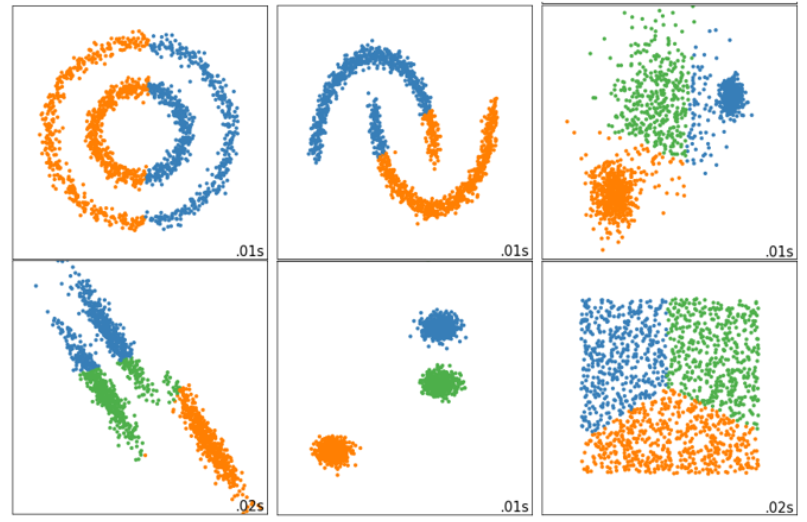

- 那我们可以使用什么指标呢?
    - 轮廓系数


### 轮廓系数
- 在99%的情况下，我们是对没有真实标签的数据进行探索，也就是对不知道真正答案的数据进行聚类。这样的聚 类，是完全依赖于评价簇内的稠密程度(簇内差异小)和簇间的离散程度(簇外差异大)来评估聚类的效果。其中 轮廓系数是最常用的聚类算法的评价指标。它是对每个样本来定义的，它能够同时衡量:
    - 1)样本与其自身所在的簇中的其他样本的相似度a，等于样本与同一簇中所有其他点之间的平均距离 
    - 2)样本与其他簇中的样本的相似度b，等于样本与下一个最近的簇中的所有点之间的平均距离 根据聚类的要求”簇内差异小，簇外差异大“，我们希望b永远大于a，并且大得越多越好。 
    - 单个样本的轮廓系数计算为:
    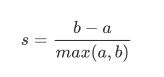

- 很容易理解轮廓系数范围是(-1,1):
    - 其中值越接近1表示样本与自己所在的簇中的样本很相似，并且与其他簇中的样本不相似，当样本点与簇外的样本更相似的时候，轮廓系数就为负。
    - 当轮廓系数为0时，则代表两个簇中的样本相似度一致，两个簇本应该是一个簇。可以总结为轮廓系数越接近于1越好，负数则表示聚类效果非常差。
- 如果一个簇中的大多数样本具有比较高的轮廓系数，则簇会有较高的总轮廓系数，则整个数据集的平均轮廓系数越高，则聚类是合适的:
    - 如果许多样本点具有低轮廓系数甚至负值，则聚类是不合适的，聚类的超参数K可能设定得 太大或者太小。

- silhouette_score计算轮廓系数
    - 在sklearn中，我们使用模块metrics中的类silhouette_score来计算轮廓系数，它返回的是一个数据集中，所有样本的轮廓系数的均值。
- silhouette_sample
    - 但我们还有同在metrics模块中的silhouette_sample，它的参数与轮廓系数一致，但返回的 是数据集中每个样本自己的轮廓系数

In [20]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [22]:
silhouette_score(X,cluster.labels_)

0.5481053842544903

In [24]:
silhouette_samples(X,cluster.labels_).sum() / X.shape[0]

0.5481053842544903